In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
sns.set_style("whitegrid")  # Set Seaborn style to whitegrid for visual consistency

# Import clustering algorithms from scikit-learn
from sklearn.cluster import KMeans  # KMeans algorithm for clustering
from sklearn.cluster import AgglomerativeClustering  # Agglomerative Clustering algorithm

# Import silhouette score metric for evaluating clustering performance
from sklearn.metrics import silhouette_score

# Import interactive widgets for Jupyter Notebook
from ipywidgets import interact

# Import warnings module and configure to ignore warnings during execution
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file ("Mall_Customers.csv") into a Pandas DataFrame
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows (default: 5 rows) of the DataFrame to understand the structure of the data
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename specific columns in the DataFrame for clarity and ease of use
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'},
                   inplace=True)

# The 'rename' function is used to rename specific columns in the DataFrame.
# The columns 'Annual Income (k$)' and 'Spending Score (1-100)' are renamed to 'Annual_Income' and 'Spending_Score' respectively.
# The argument 'inplace=True' ensures that the changes are made directly to the original DataFrame without the need for assignment.
# This renaming is performed for improved readability and convenience when working with these columns in subsequent analyses.


In [4]:
# Display the first few rows of the DataFrame to get an overview of the data
df.head()



,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
# Check for and count duplicated rows in the DataFrame
duplicate_rows = df.duplicated().sum()

# The 'duplicated()' function in Pandas is used to identify duplicate rows in a DataFrame.
# It returns a Boolean Series indicating whether each row is a duplicate or not.
# The 'sum()' function is then used to count the `True` values, indicating the number of duplicated rows.
# This provides insight into the presence of duplicate records in the dataset.

# The variable 'duplicate_rows' now holds the count of duplicated rows in the DataFrame.
# It's useful to identify and handle duplicated data, ensuring the accuracy of analysis and modeling processes.


In [7]:
# Check for duplicates and drop them, keeping the first occurrence
df = df.drop_duplicates()

# The 'drop_duplicates()' function in Pandas is used to remove duplicate rows from the DataFrame.
# By default, it keeps the first occurrence of each set of duplicates and removes the subsequent ones.
# This ensures that the DataFrame contains only unique rows based on all columns.

# Now, the DataFrame 'df' does not have any duplicate records, as they have been dropped.
# You can proceed with your analysis and modeling on this cleaned DataFrame.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [11]:
df.drop(columns="CustomerID", inplace=True)
# CustomerID is like index for us, so we drop it.

In [12]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    # Randomly select a color from ['blue', 'red', 'green']
    colors = np.random.choice(['blue', 'red', 'green'])
    
    # Check if the selected chart type is "countplot"
    if chart == "countplot":
        # Create a countplot for the selected column
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')  # Set title for the countplot
        plt.xlabel(col)  # Set x-axis label for the countplot
        ax.bar_label(ax.containers[0])  # Add labels to bars in the countplot

    # If the selected chart type is "histogram"
    else:
        # Create a histogram for the selected column with 80 bins and KDE
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')  # Set title for the histogram
        plt.xlabel(col)  # Set x-axis label for the histogram
        ax.bar_label(ax.containers[0])  # Add labels to bars in the histogram


interactive(children=(Dropdown(description='col', options=('Age', 'Annual_Income', 'Spending_Score'), value='A…

(-1.25, 1.25, -1.25, 1.25)

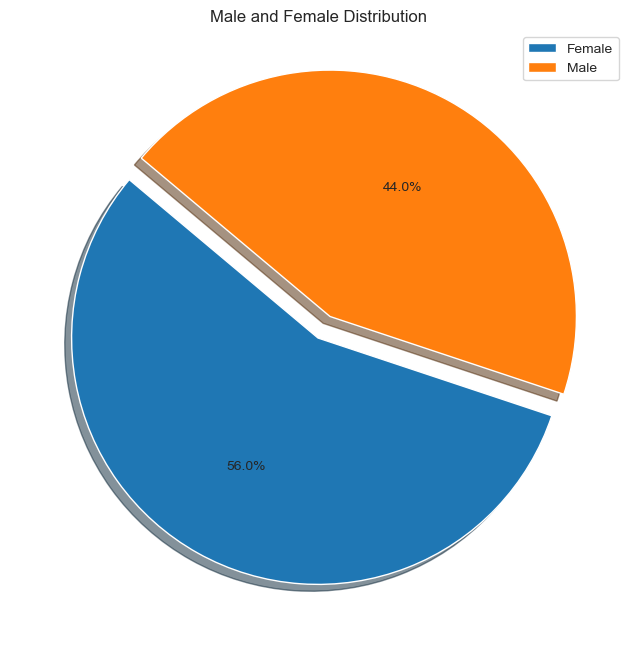

In [14]:
# Create a pie chart to visualize gender distribution in the dataset
plt.figure(figsize=(8, 8))

# Explode the 'Male' slice for emphasis
explode = [0, 0.1]

# Plot the pie chart using gender value counts
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',  # Display percentage on each slice
        shadow=True,
        startangle=140)  # Rotate the pie chart to start from angle 140 degrees

# Add legend and title to the pie chart
plt.legend(labels=['Female', 'Male'])  # Add legend with corresponding labels
plt.title('Male and Female Distribution')  # Set the title of the pie chart

# Turn off the axis for better visualization
plt.axis('off')

# Explanation: We use a pie chart to compare the gender distribution, a significant factor in customer segmentation.


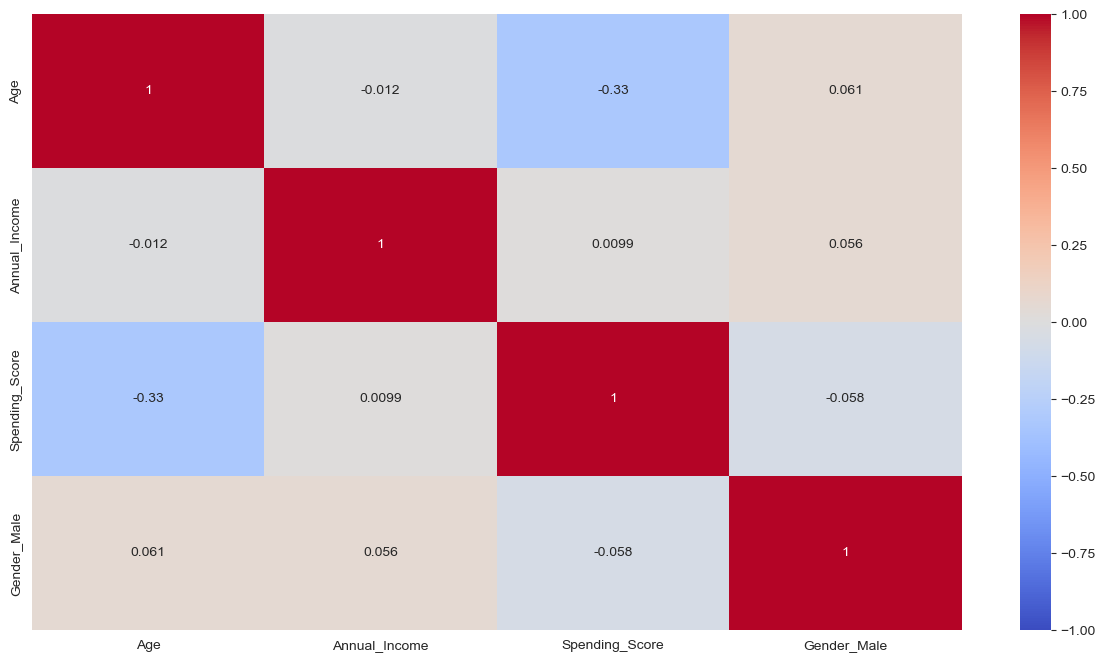

In [15]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Create a heatmap to visualize the correlation between features in the dataset
plt.figure(figsize=(15, 8))

# Generate a heatmap using the correlation matrix, annotate with correlation values
sns.heatmap(df_encoded.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

# Display the heatmap
plt.show()

# Explanation: This heatmap illustrates the correlation between features after converting categorical variables using one-hot encoding.


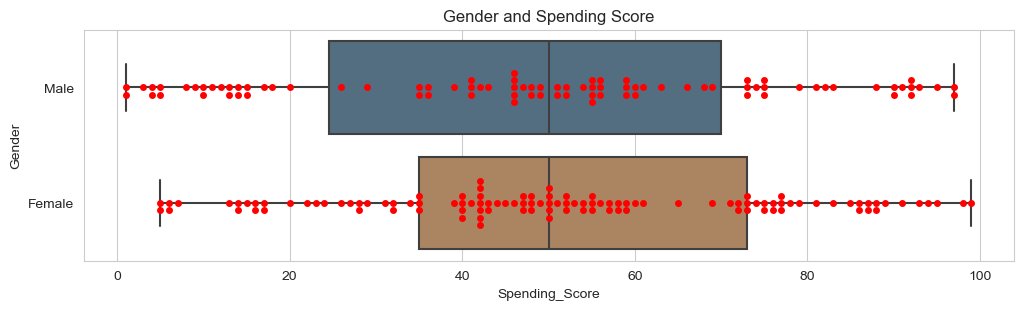

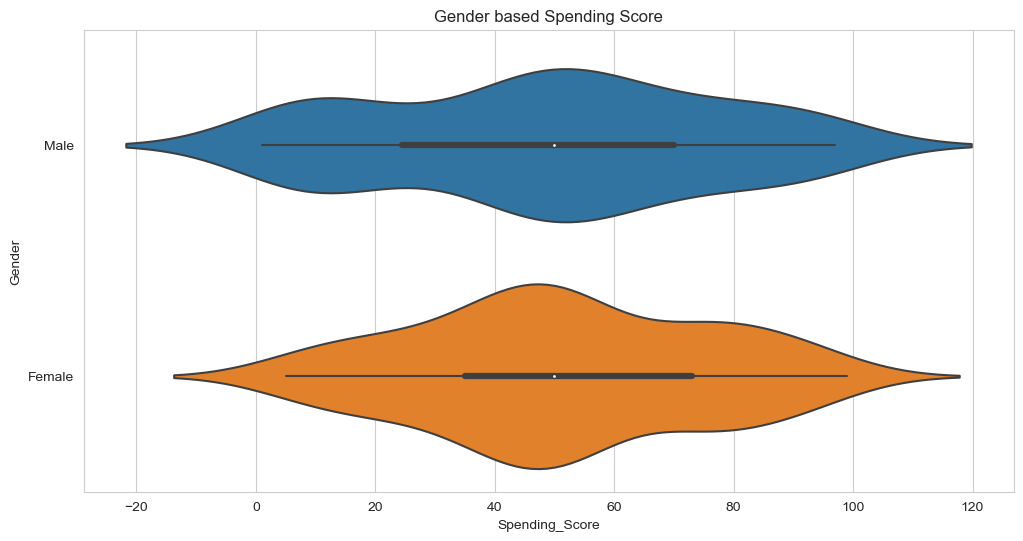

In [16]:
# Swarmplot and Boxplot
plt.figure(figsize=(12, 3))

# Swarmplot: Used to visualize the distribution of categorical data points
sns.swarmplot(x='Spending_Score', y='Gender', data=df, color="r")

# Boxplot: Displays the summary of a set of data values, including the minimum, first quartile, median, third quartile, and maximum
sns.boxplot(x='Spending_Score', y='Gender', data=df, saturation=.3)
plt.title('Gender and Spending Score')
plt.show()

# Explanation: The swarmplot shows individual data points and their distribution based on spending score and gender.
# The boxplot provides a summary of spending score for each gender, indicating median, quartiles, and outliers.

# Violinplot
plt.figure(figsize=(12, 6))

# Violinplot: Combines aspects of box plot and kernel density plot, providing insights into the data distribution and density
sns.violinplot(x='Spending_Score', y='Gender', data=df)
plt.title('Gender based Spending Score')
plt.show()

# Explanation: The violinplot offers a deeper view of the spending score distribution based on gender, showing the density along with quartiles and median.


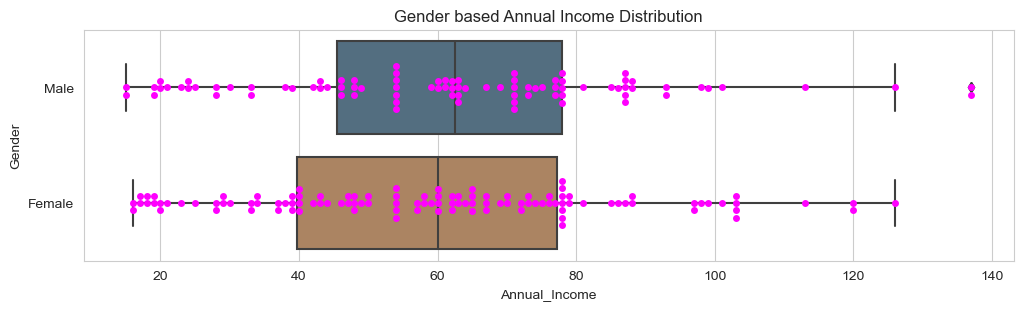

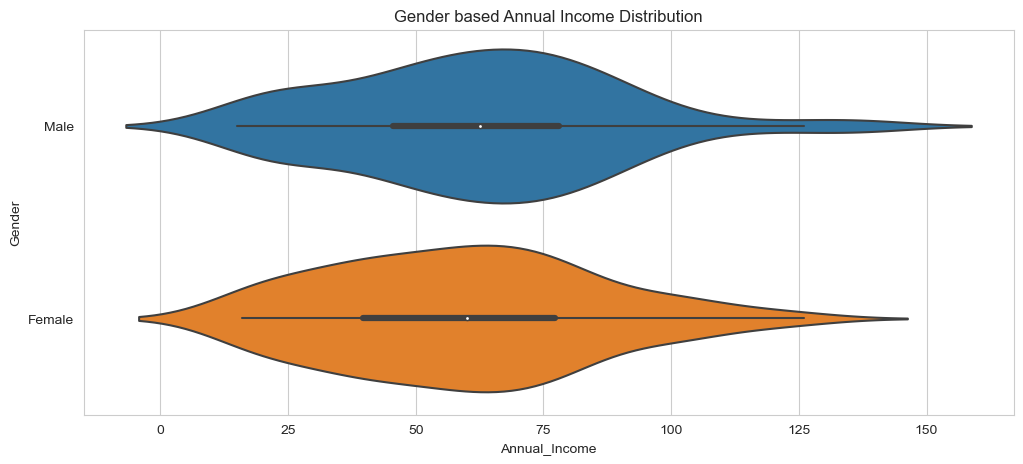

In [17]:
# Swarmplot and Boxplot for Annual Income
plt.figure(figsize=(12, 3))

# Swarmplot: Visualizes the distribution of categorical data points for annual income and gender
sns.swarmplot(x='Annual_Income', y='Gender', data=df, color="magenta")

# Boxplot: Provides a summary of annual income for each gender
sns.boxplot(x='Annual_Income', y='Gender', data=df, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

# Explanation: Swarmplot displays individual data points for annual income and gender, while the boxplot summarizes income distributions for each gender.

# Violinplot for Annual Income
plt.figure(figsize=(12, 5))

# Violinplot: Represents the density and distribution of annual income for different genders
sns.violinplot(x='Annual_Income', y='Gender', data=df, orient="h")
plt.title('Gender based Annual Income Distribution')
plt.show()

# Explanation: Violinplot provides a detailed view of the density and distribution of annual income for different genders horizontally.


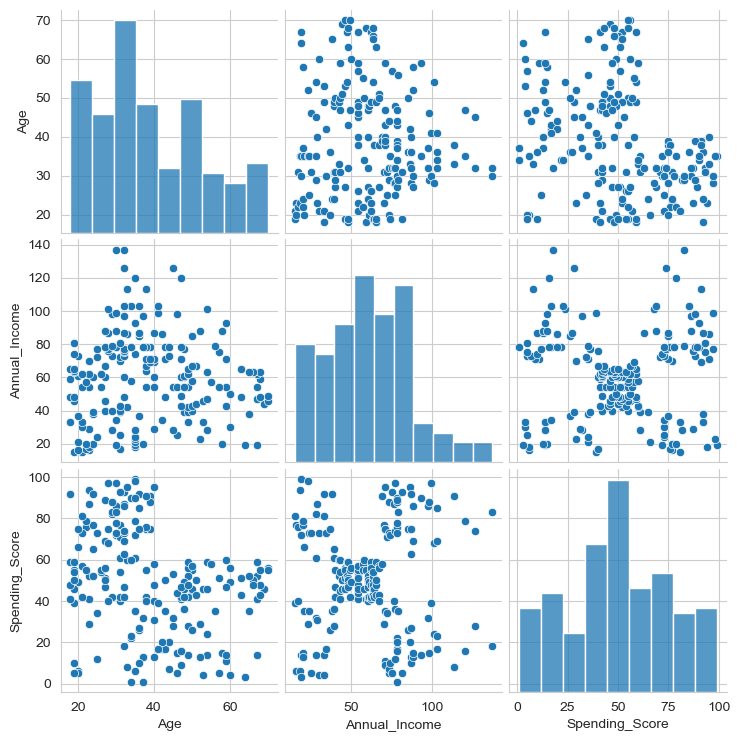

In [18]:
sns.pairplot(df);

# we look at pairplot to get an idea of how many clusters we can create using which variables.
# Caution : If your data has too many features it is hard to use pairplot. It will take too much time
# You can use PCA(dimension reduction technique) and use 3 to 5 componenets to get insight

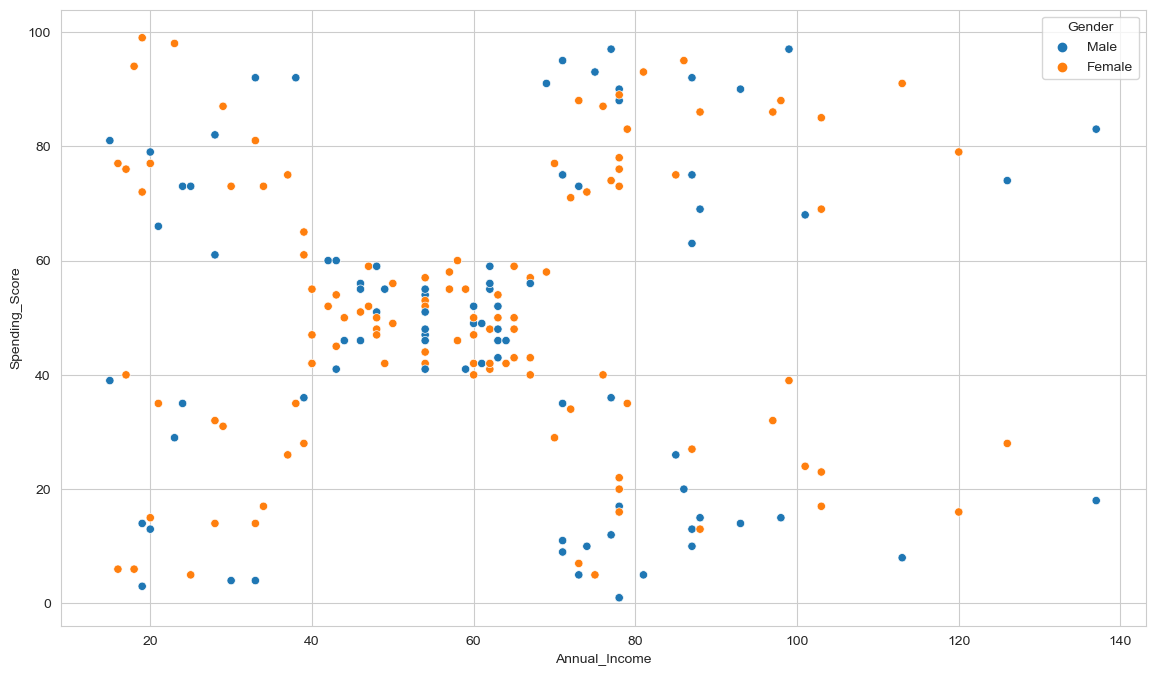

In [19]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()
# We look at the distribution of gender in the clustering we will create using Annual_Income and Spending_Score,
# which caught our eye above.

In [20]:
df_2 = df.drop(columns="Gender")
df_2
# We do not use categorical features in k-means algorithms.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [21]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

# Define the Hopkins statistic function to measure cluster tendency
def hopkins(X, ratio=0.05):
    # Check if input is a DataFrame, if so, convert it to a numpy array
    if not isinstance(X, np.ndarray):
        X = X.values
    
    # Calculate the sample size based on the given ratio
    sample_size = int(X.shape[0] * ratio)
    
    # Generate a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))
    
    # Generate a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    
    # Initialize Nearest Neighbors for neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)
    
    # Compute distances to the first nearest neighbors from the uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbor
    
    # Compute distances to the second nearest neighbors from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    w_distances = w_distances[:, 1]  # distance to the second nearest neighbor
    
    # Calculate the sum of nearest neighbor distances from the uniform random sample (u_sum)
    u_sum = np.sum(u_distances)
    
    # Calculate the sum of second nearest neighbor distances from the random sample (w_sum)
    w_sum = np.sum(w_distances)
    
    # Compute and return Hopkins' statistic (H)
    H = u_sum / (u_sum + w_sum)
    return H

# Example usage of the Hopkins statistic function
# H = hopkins(dataframe)


In [22]:
hopkins(df_2, 1)

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# We say that the closer it is to 1, the more prone to data clustering.

0.6896904731971344

In [23]:
# Select the 'Age' and 'Spending_Score' columns from the DataFrame and create a new DataFrame X_age_ss
X_age_ss = df.loc[:, ['Age', 'Spending_Score']]


In [24]:
hopkins(X_age_ss, 1)

0.6848654152579607

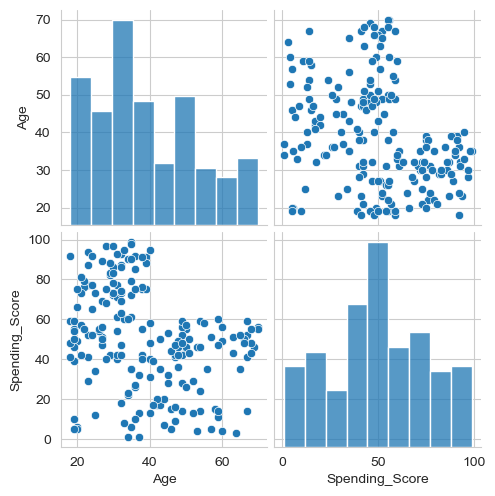

In [25]:
sns.pairplot(X_age_ss);
# We look at the distributions of age and spending score.

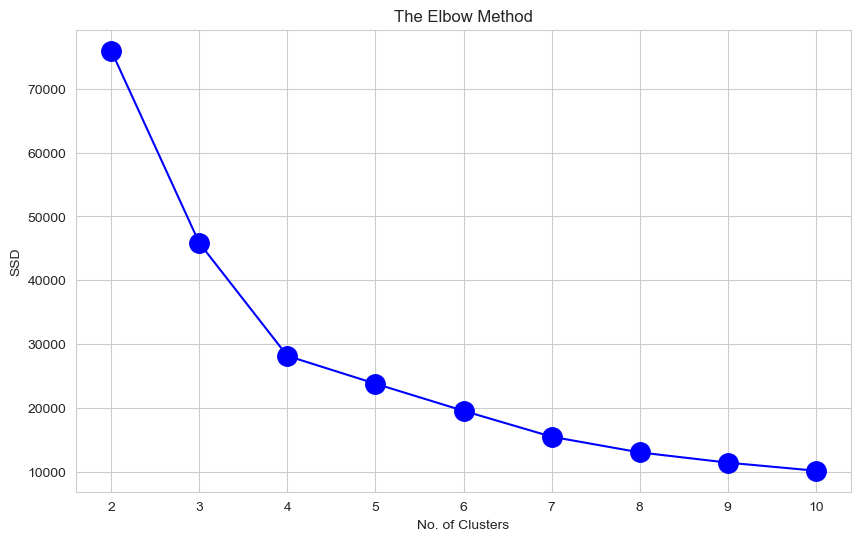

In [26]:
# Initialize an empty list to store Sum of Squared Distances (SSD) for different cluster numbers
ssd = []

# Iterate through cluster numbers from 2 to 10
for n in range(2, 11):
    # Initialize KMeans clustering model with n clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=n, random_state=42)
    # Fit the KMeans model to the data
    kmeans.fit(X_age_ss)
    # Append the inertia_ (SSD) to the ssd list
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(10, 6))
# Plot cluster numbers on the x-axis and corresponding SSD values on the y-axis with blue markers ('bo-')
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
# Set the title of the plot
plt.title('The Elbow Method')
# Label the x-axis as 'No. of Clusters'
plt.xlabel('No. of Clusters')
# Label the y-axis as 'SSD'
plt.ylabel('SSD')
# Display the plot
plt.show()
# Reference to a new paper about the elbow method is provided for further reading


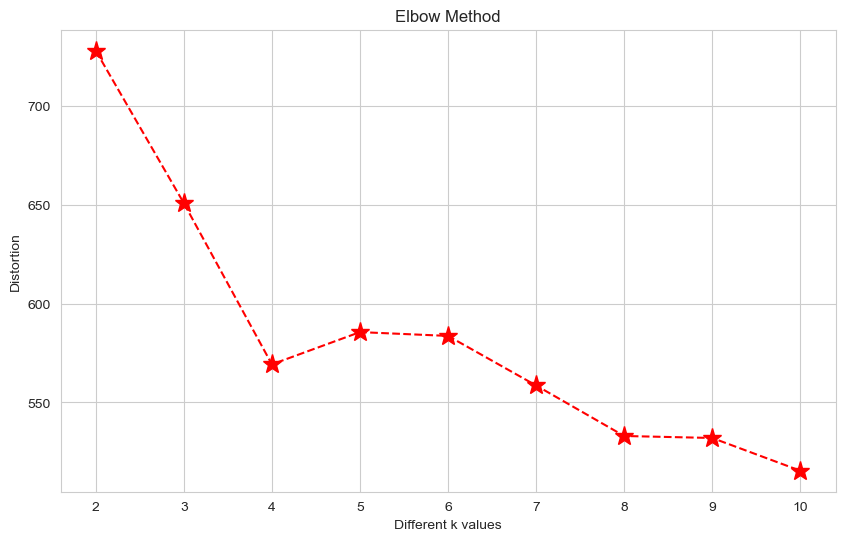

In [27]:
# Define a range of cluster numbers from 2 to 10
K = range(2, 11)

# Initialize an empty list to store distortion values for different cluster numbers
distortion = []

# Iterate through each cluster number in the defined range
for k in K:
    # Initialize a KMeans clustering model with k clusters and a fixed random state for reproducibility
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    # Fit the KMeans model to the data
    kmeanModel.fit(X_age_ss)
    # Compute distances from each observation to each cluster centroid
    distances = kmeanModel.transform(X_age_ss)
    # Get cluster labels for each observation
    labels = kmeanModel.labels_
    result = []
    # Iterate through clusters
    for i in range(k):
        # Get distances from observations in the current cluster to their own centroid
        cluster_distances = distances[labels == i, i]
        # Calculate the mean of squared distances from observations in the cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2))
    # Sum the means of squared distances from all clusters and add it to the distortion list
    distortion.append(sum(result))

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(10,6))
# Plot cluster numbers on the x-axis and corresponding distortion values on the y-axis with red stars ('r*--')
plt.plot(K, distortion, "r*--", markersize=14.0)
# Label the x-axis as 'Different k values'
plt.xlabel("Different k values")
# Label the y-axis as 'Distortion'
plt.ylabel("Distortion")
# Set the title of the plot
plt.title("Elbow Method")
# Display the plot
plt.show()


In [28]:
# Import the silhouette_score function from sklearn.metrics
from sklearn.metrics import silhouette_score

# Define a range of cluster numbers from 2 to 10
range_n_clusters = range(2, 11)

# Iterate through each cluster number in the defined range
for num_clusters in range_n_clusters:
    # Initialize a KMeans clustering model with num_clusters clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    # Fit the KMeans model to the data
    kmeans.fit(X_age_ss)
    # Get cluster labels for each observation
    cluster_labels = kmeans.labels_
    # Compute silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    # Print the silhouette score for the current number of clusters
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

    

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


In [29]:
# Import necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Initialize a KMeans clustering model with 4 clusters and a fixed random state for reproducibility
model3 = KMeans(n_clusters=4, random_state=42)

# Initialize a SilhouetteVisualizer with the KMeans model
visualizer = SilhouetteVisualizer(model3)

# Fit the data to the visualizer
visualizer.fit(X_age_ss)

# Visualize the silhouette scores
visualizer.poof()


ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
model3.n_clusters
#We can get the number of clusters with .n_clusters.

In [ ]:
# Loop through each cluster label in the range defined by model3.n_clusters
for i in range(model3.n_clusters):
    # Create a boolean mask for the current cluster label
    label = (model3.labels_ == i)
    # Calculate the mean silhouette score for the current cluster label
    mean_silhouette_score = visualizer.silhouette_samples_[label].mean()
    # Print the mean silhouette score for the current cluster label
    print(f"mean silhouette score for label {i:<4} : {mean_silhouette_score}")

# Calculate and print the mean silhouette score for all labels combined
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")


In [ ]:
# Define distances
b = (1.1 + 1.2) / 2  # Mean distance to other clusters
a = ((1 + 1) ** 0.5 + (1 + 1) ** 0.5) / 2  # Mean distance within the same cluster

# Calculate silhouette score
silhouette_score = (b - a) / max(a, b)

# Print the intermediate steps and the silhouette score
print("Mean other-cluster distance (b):", b)
print("Mean intra-cluster distance (a):", a)
print("Silhouette Score:", silhouette_score)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

# n_clusters = 4. Since we decided to have 4 clusters according to age and spending score.

In [37]:
# Fit the KMeans clustering algorithm to the data X_age_ss and predict clusters for each data point
# This line trains the KMeans model on the dataset X_age_ss, grouping similar data points into clusters.
# The `fit_predict` method fits the model to the data and assigns cluster labels to each data point.
kmeans.fit_predict(X_age_ss)


array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [38]:
df_age_ss = X_age_ss.copy()
df_age_ss

# We perform the copy operation as we will perform a clustering operation and compare it with Hierarchical Clustering.

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [40]:
# Assign the cluster labels obtained from KMeans clustering to the "cluster_Kmeans" column in the DataFrame df_age_ss
# This line adds a new column to the DataFrame containing the cluster labels assigned by the KMeans algorithm.
df_age_ss["cluster_Kmeans"] = kmeans.fit_predict(X_age_ss)
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


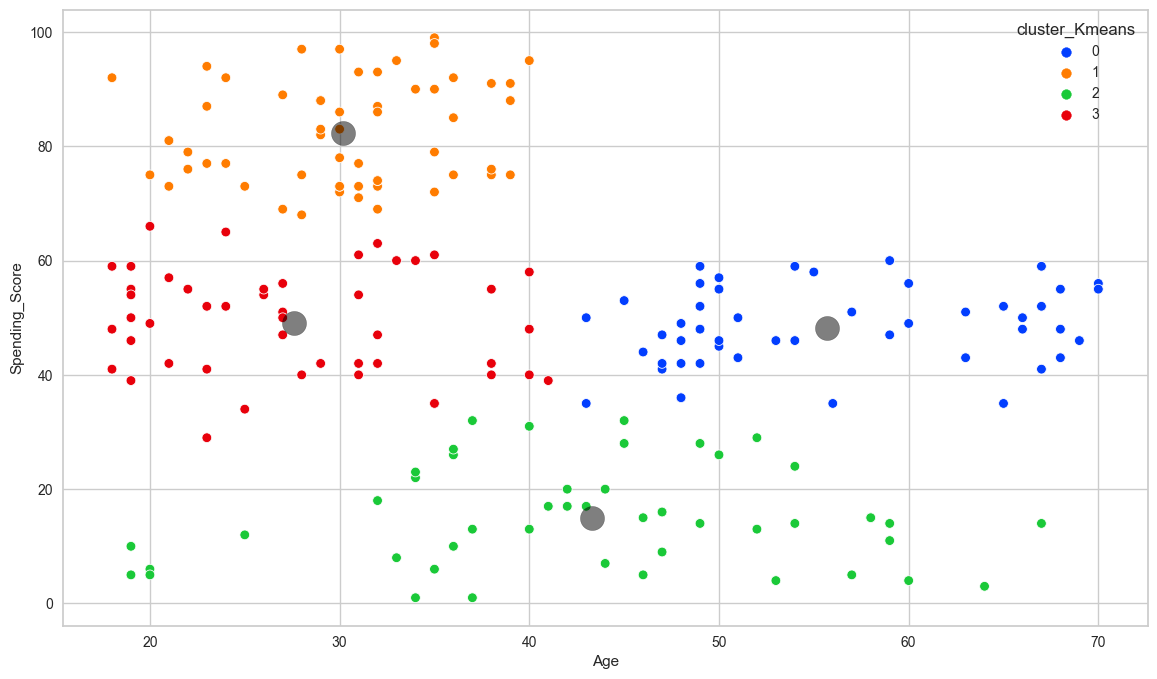

In [41]:
# Create a scatter plot using Age and Spending_Score as x and y coordinates respectively, 
# hue='cluster_Kmeans' colors the points based on the cluster labels assigned by the KMeans algorithm.
# palette="bright" specifies the color palette for different clusters.
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age',  # X-axis represents the 'Age' feature
                y='Spending_Score',  # Y-axis represents the 'Spending_Score' feature
                hue='cluster_Kmeans',  # Color points based on the cluster labels assigned by KMeans
                data=df_age_ss,  # Data source is the DataFrame df_age_ss
                palette="bright")  # Use a bright color palette for better visibility of clusters

# Get the cluster centroids from the KMeans model and plot them on the scatter plot.
# Centers of the clusters are plotted as black points with a larger size (s=300) and reduced opacity (alpha=0.5).
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],  # X-coordinates of cluster centroids
            centers[:, 1],  # Y-coordinates of cluster centroids
            c='black',  # Color of the centroids is black
            s=300,  # Size of the centroids' markers
            alpha=0.5)  # Opacity of the centroids' markers

# Adding the comment to describe the purpose of the visualization
# The plot illustrates the clusters formed by age and spending score, with cluster centroids depicted as black points.


In [42]:
# People show certain shopping behaviors in certain age periods.
# Therefore, the campaigns we will apply to cluster_0 and cluster_3 will not be the same.

In [43]:
# Extract the 'Annual_Income' and 'Spending_Score' columns from the DataFrame df and create a new DataFrame X_ai_ss.
X_ai_ss = df[['Annual_Income', 'Spending_Score']]

# Display the first few rows of the new DataFrame X_ai_ss.
X_ai_ss.head()


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [44]:
# Call the 'hopkins' function to compute Hopkins statistic for the DataFrame X_ai_ss with a sample size ratio of 1 (100% of the data).
# Hopkins statistic measures the cluster tendency of a dataset. A value closer to 1 indicates the dataset's suitability for clustering.
hopkins(X_ai_ss, 1)


0.6885013184531631

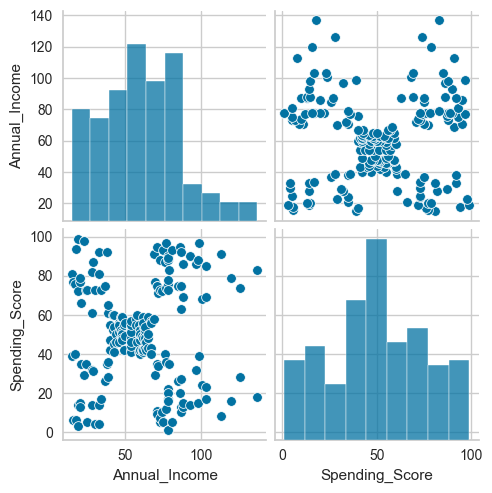

In [45]:
sns.pairplot(X_ai_ss)
# We look at the distributions of Annual_Income and Spending_Score.

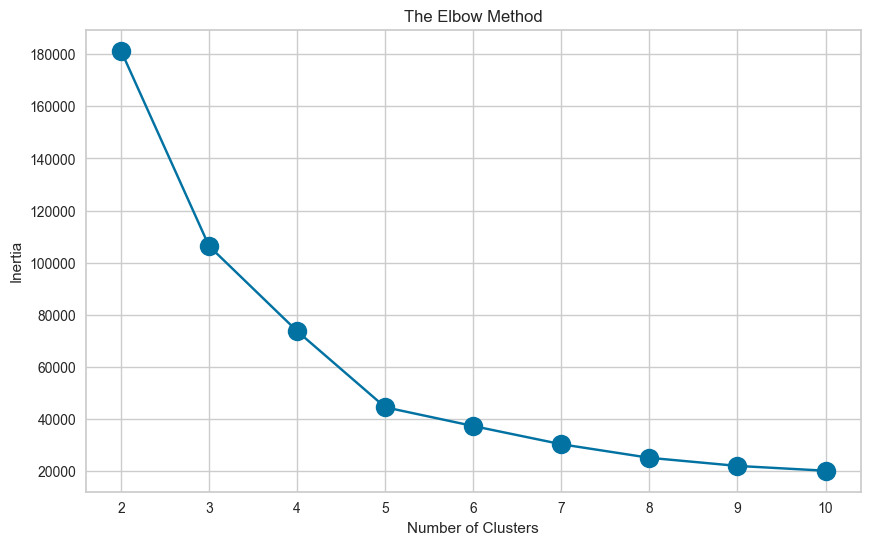

In [46]:
# Initialize an empty list 'ssd' to store the sum of squared distances (inertia) for different numbers of clusters.
ssd = []

# Iterate through the range of cluster numbers from 2 to 10.
for n in range(2, 11):
    # Create a KMeans model with n clusters and set a random state for reproducibility.
    kmeans = KMeans(n_clusters=n, random_state=42)
    
    # Fit the model to the data (X_ai_ss) and calculate the inertia (sum of squared distances from each point to its assigned cluster center).
    kmeans.fit(X_ai_ss)
    
    # Append the inertia value to the 'ssd' list.
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method graph to determine the optimal number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)  # Plotting cluster numbers (x-axis) vs. inertia (y-axis).
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Text(0.5, 1.0, 'Elbow Method')

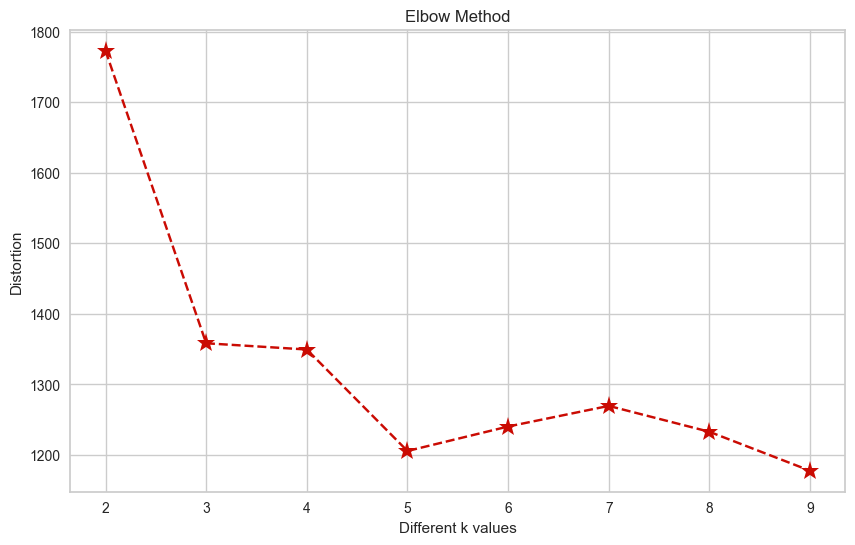

In [47]:
# Define a range of cluster numbers from 2 to 9.
K = range(2, 10)

# Initialize an empty list 'distortion' to store the distortion values for different numbers of clusters.
distortion = []

# Iterate through the range of cluster numbers.
for k in K:
    # Create a KMeans model with k clusters and set a random state for reproducibility.
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the data (X_ai_ss).
    kmeanModel.fit(X_ai_ss)
    
    # Calculate the distances from each observation to each cluster centroid.
    distances = kmeanModel.transform(X_ai_ss)
    
    # Get the cluster labels assigned by the KMeans model.
    labels = kmeanModel.labels_
    
    # Initialize an empty list 'result' to store mean squared distances for each cluster.
    result = []
    
    # Iterate through each cluster.
    for i in range(k):
        # Filter distances to include only observations in the current cluster.
        cluster_distances = distances[labels == i, i]
        
        # Calculate the mean of squared distances from observations in the cluster to their own centroid.
        result.append(np.mean(cluster_distances ** 2))
    
    # Sum the mean squared distances of all clusters and append the total to the 'distortion' list.
    distortion.append(sum(result))

# Plot the distortion values for different numbers of clusters.
plt.figure(figsize=(10, 6))
plt.plot(K, distortion, "r*--", markersize=14.0)  # Plotting cluster numbers (x-axis) vs. distortion (y-axis).
plt.xlabel("Different k values")  # X-axis label indicating different numbers of clusters.
plt.ylabel("Distortion")  # Y-axis label indicating distortion values.
plt.title("Elbow Method")  # Title of the plot.


In [48]:
# Import necessary library for silhouette score calculation.
from sklearn.metrics import silhouette_score

# Define a range of cluster numbers from 2 to 10.
range_n_clusters = range(2, 11)

# Iterate through the range of cluster numbers.
for num_clusters in range_n_clusters:
    # Initialize KMeans model with the current number of clusters and set a random state for reproducibility.
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the KMeans model to the data (X_ai_ss).
    kmeans.fit(X_ai_ss)
    
    # Get the cluster labels assigned by the KMeans model.
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score for the current number of clusters.
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    
    # Print the silhouette score for the current number of clusters.
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367
For n_clusters=10, the silhouette score is 0.4410568674364981


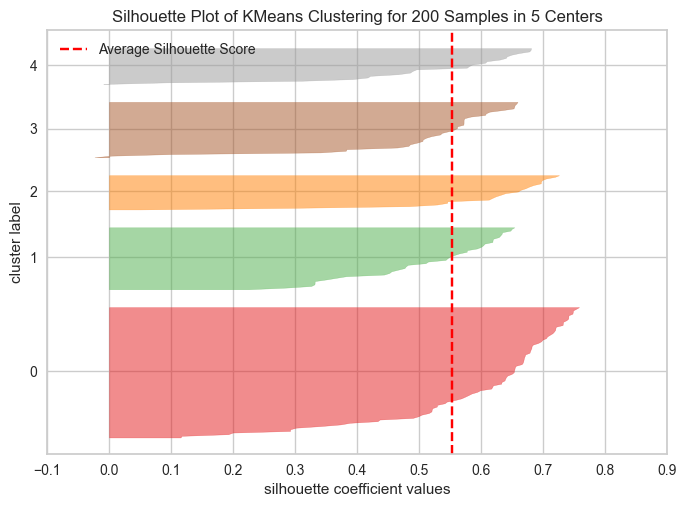

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# Initialize a KMeans model with 5 clusters and set a random state for reproducibility.
model4 = KMeans(n_clusters=5, random_state=42)

# Initialize a SilhouetteVisualizer with the KMeans model.
visualizer = SilhouetteVisualizer(model4)

# Fit the KMeans model to the data (X_ai_ss) and visualize silhouette scores.
visualizer.fit(X_ai_ss)
visualizer.poof()


In [50]:
# The number of samples of cluster 0 is higher than other clusters

In [51]:
# Loop through each cluster label in the KMeans model.
for i in range(model4.n_clusters):
    label = (model4.labels_ == i)  # Boolean mask for samples in the current cluster.
    # Print mean silhouette score for samples in the current cluster.
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")

# Print the overall mean silhouette score for all labels.
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")


mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


In [52]:
kmeans2 = KMeans(n_clusters=5, random_state=42)  # Create a KMeans clustering model with 5 clusters and a fixed random state.
kmeans2.fit_predict(X_ai_ss)  # Fit the model to the data and simultaneously assign cluster labels to each data point.


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [53]:
df_ai_ss = X_ai_ss.copy()  # Create a copy of the DataFrame `X_ai_ss` containing the features 'Annual_Income' and 'Spending_Score'.
df_ai_ss.head()  # Display the first few rows of the copied DataFrame.


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [54]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss)  # Apply KMeans clustering algorithm to the features in `X_ai_ss` and assign the cluster labels to the new column 'cluster_Kmeans' in `df_ai_ss`.
df_ai_ss  # Display the updated DataFrame with the cluster labels.


,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


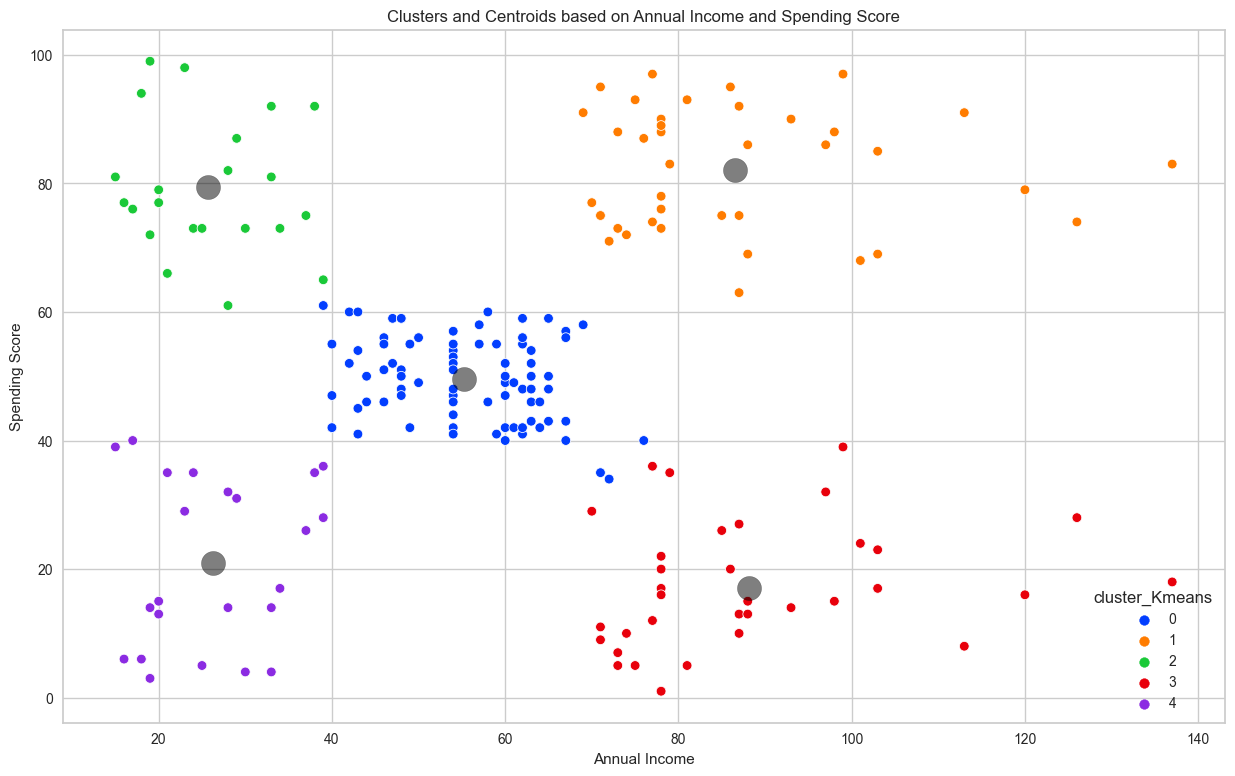

In [55]:
plt.figure(figsize=(15, 9))  # Create a new figure with a specific size for the scatter plot.

sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette="bright")  # Create a scatter plot with specified data and attributes.
                
centers = kmeans2.cluster_centers_  # Get the centroids of the clusters obtained from KMeans.

plt.scatter(centers[:, 0],  # X-coordinates of cluster centers for plotting.
            centers[:, 1],  # Y-coordinates of cluster centers for plotting.
            c='black',  # Color of the cluster centers (black).
            s=300,  # Marker size of the cluster centers.
            alpha=0.5)  # Opacity level of the cluster centers.

plt.title('Clusters and Centroids based on Annual Income and Spending Score')  # Set the title of the plot.
plt.xlabel('Annual Income')  # Set the label for the x-axis.
plt.ylabel('Spending Score')  # Set the label for the y-axis.

plt.show()  # Display the scatter plot.


We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:
The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.
Hierarchical Clustering
i. Determine optimal number of clusters using Dendogram
Clustering based on Age and Spending Score

In [56]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [57]:
from scipy.cluster.hierarchy import linkage  # Import the linkage function from scipy's hierarchy module.

# In order to draw a dendrogram, it's not enough to give the data directly, we have to use linkage.


In [58]:
from scipy.cluster.hierarchy import dendrogram

In [59]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_age_ss, method=method)  # Compute linkage matrix using the specified method.
    plt.figure(figsize=(20, 10))  # Set the size of the dendrogram plot.
    plt.title("Dendrogram")  # Set the title of the dendrogram plot.
    plt.xlabel("Observations")  # Label the x-axis of the plot.
    plt.ylabel("Distance")  # Label the y-axis of the plot.
    dendrogram(link,  # Draw the dendrogram using the computed linkage matrix.
               truncate_mode="lastp",  # Method to truncate the dendrogram. 'lastp' trims the last p non-singleton nodes.
               p=10,  # Number of points in the plot to annotate and truncate.
               show_contracted=True,  # Show condensed cluster nodes.
               leaf_font_size=10)  # Set font size for the leaf labels.


interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [60]:
# Recommended us 2 clusters, but considering the distances between clusters, it recommends 2 . For that reason ;
# Let's take some advice by looking at silhouette_scores:

In [61]:
range_n_clusters = range(2, 11)  # Define a range of cluster numbers from 2 to 10.
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)  # Initialize Agglomerative Clustering model with the current number of clusters.
    Agg_model.fit(X_age_ss)  # Fit the model to the data.
    cluster_labels = Agg_model.labels_  # Get cluster labels for each data point.
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)  # Calculate silhouette score for the current clustering.
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )  # Print the silhouette score for the current number of clusters.


For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


Clustering based on Annual Income and Spending Score

In [62]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [63]:
@interact(method=["ward", "complete", "average", "single"])  # Interactive widget allowing selection of different linkage methods.
def dendrogramer(method):
    link = linkage(y=X_ai_ss, method=method)  # Calculate the linkage matrix using the specified method.
    plt.figure(figsize=(20, 10))  # Set the figure size for the dendrogram plot.
    plt.title("Dendrogram")  # Set the title of the plot.
    plt.xlabel("Observations")  # Label for x-axis.
    plt.ylabel("Distance")  # Label for y-axis.
    dendrogram(link,
               truncate_mode="lastp",  # Method to truncate the dendrogram. 'lastp' truncates the last p non-singleton clusters.
               p=10,  # Number of clusters to display when truncate_mode is 'lastp'.
               show_contracted=True,  # Show condensed tree with contracted branches.
               leaf_font_size=10)  # Font size for the leaf labels in the dendrogram.


interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [64]:
range_n_clusters = range(2, 11)  # Define a range of cluster numbers to evaluate.
for num_clusters in range_n_clusters:
    # Initialize AgglomerativeClustering with the current number of clusters.
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)  # Fit the model to the data.
    cluster_labels = Agg_model.labels_  # Get cluster labels for each data point.
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)  # Compute silhouette score.
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )  # Print the silhouette score for the current number of clusters.


For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


Apply Agglomerative Clustering
Age and Spending Score

In [65]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [67]:
# Initialize AgglomerativeClustering with specific parameters.
Agg1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward") 

# Agg1 = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
# In newer sklearn versions, "metric" parameter is used instead of "affinity". 
# However, if linkage="ward", metric='euclidean' is required.

# Fit the AgglomerativeClustering model to the data and obtain cluster labels.
y_agg = Agg1.fit_predict(X_age_ss)


In [68]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [69]:
# Add the Agglomerative Clustering labels as a new column to the dataframe.
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()


,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


Annual Income and Spending Score

In [70]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [71]:
# Create an instance of Agglomerative Clustering with 5 clusters using the "ward" linkage method and "euclidean" affinity.
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #older sklearn

# Fit the Agglomerative Clustering model to the data and obtain cluster labels for each sample.
y_agg2 = Agg2.fit_predict(X_ai_ss)


In [72]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [73]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


In [ ]:
# labels are different but their locations are almost the same (cluster_Kmeans - cluster_Agg)

iii. Visualizing and Labeling All the Clusters
Age and Spending Score

In [74]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


<Axes: xlabel='Age', ylabel='Spending_Score'>

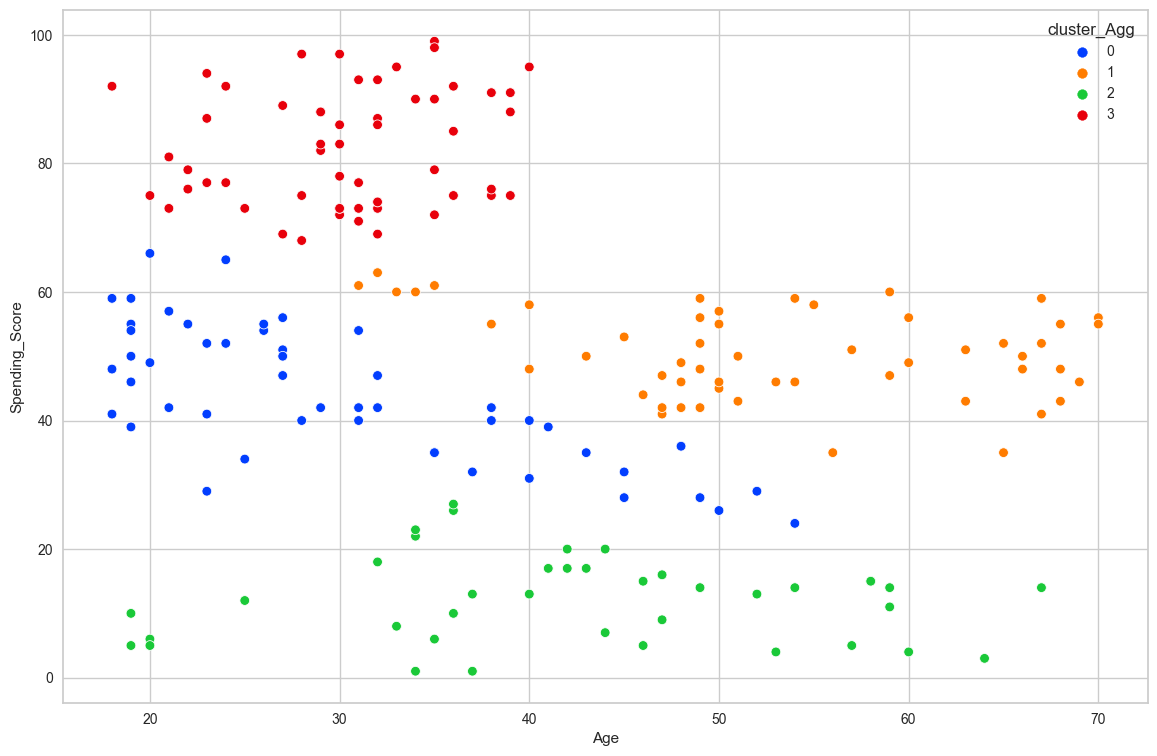

In [75]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_ss,
                palette="bright")

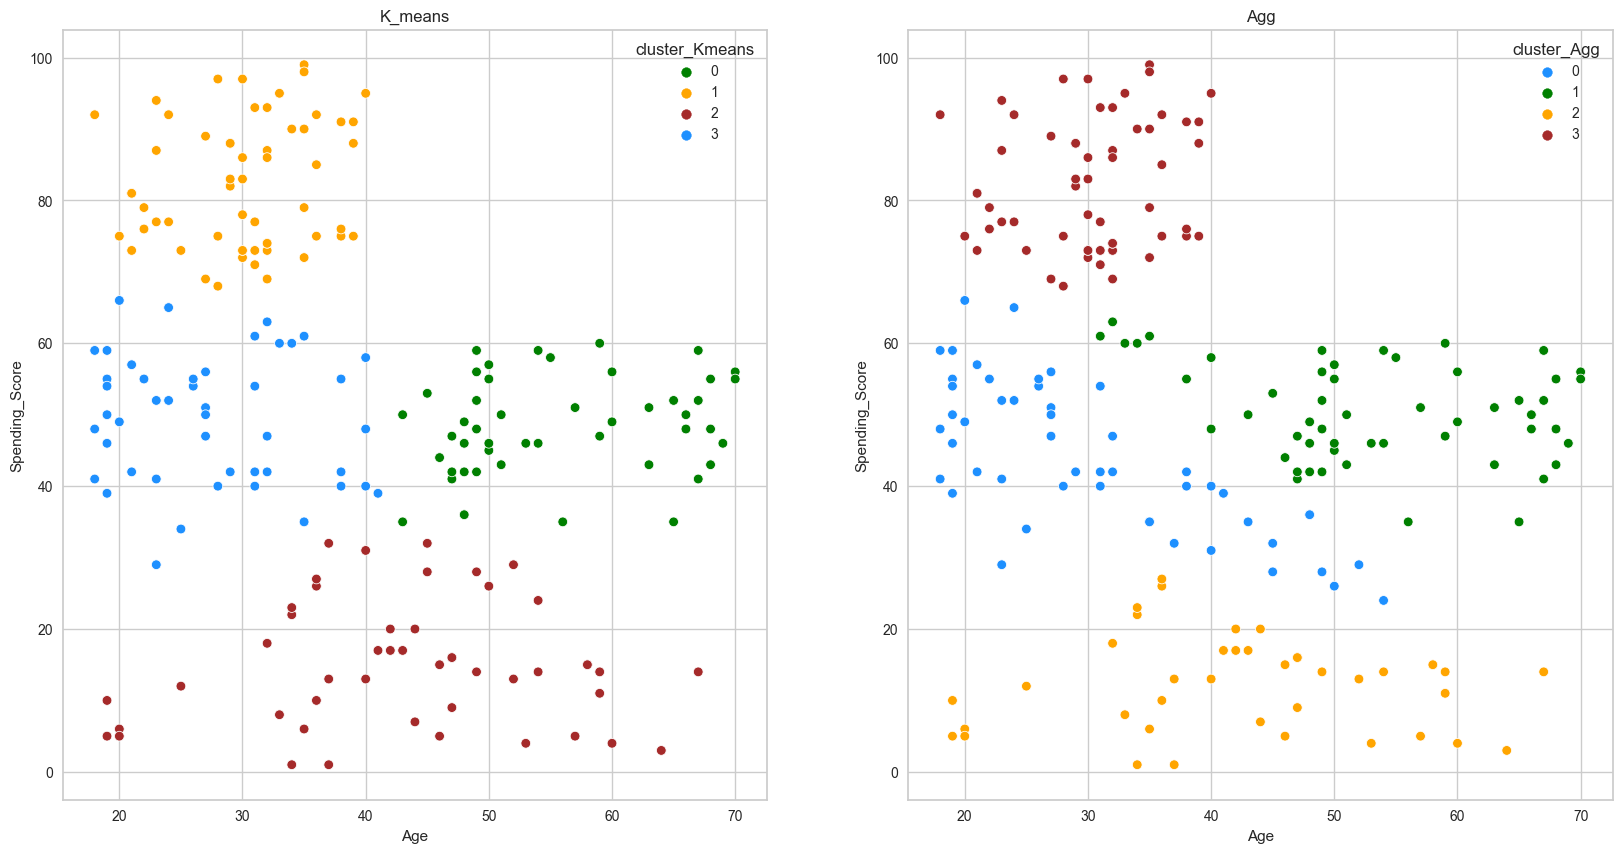

In [76]:
# Create a figure with subplots for comparing clusters formed by K-means and Agglomerative Clustering based on Age and Spending Score.
plt.figure(figsize=(20, 10))  # Set the size of the entire figure to (20, 10) inches.

# Create the first subplot (1 row, 2 columns, first column).
plt.subplot(121)
sns.scatterplot(x='Age',  # Data for the x-axis, representing 'Age'.
                y='Spending_Score',  # Data for the y-axis, representing 'Spending_Score'.
                hue='cluster_Kmeans',  # Cluster labels for coloring different clusters differently.
                data=df_age_ss,  # DataFrame containing the data for the plot.
                palette=['green', 'orange', 'brown', 'dodgerblue'])  # Color palette for K-means clusters.
plt.title("K_means")  # Set the title of the first subplot.

# Create the second subplot (1 row, 2 columns, second column).
plt.subplot(122)
sns.scatterplot(x='Age',  # Data for the x-axis, representing 'Age'.
                y='Spending_Score',  # Data for the y-axis, representing 'Spending_Score'.
                hue='cluster_Agg',  # Cluster labels for coloring different clusters differently.
                data=df_age_ss,  # DataFrame containing the data for the plot.
                palette=['dodgerblue', 'green', 'orange', 'brown'])  # Color palette for Agglomerative Clustering clusters.
plt.title("Agg");  # Set the title of the second subplot.


# Hierarchical Clustering has not drawn the cluster boundaries sharply.
# It is necessary to pay attention to this. Kmeans is better separated.

#### Annual Income and Spending Score


In [77]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

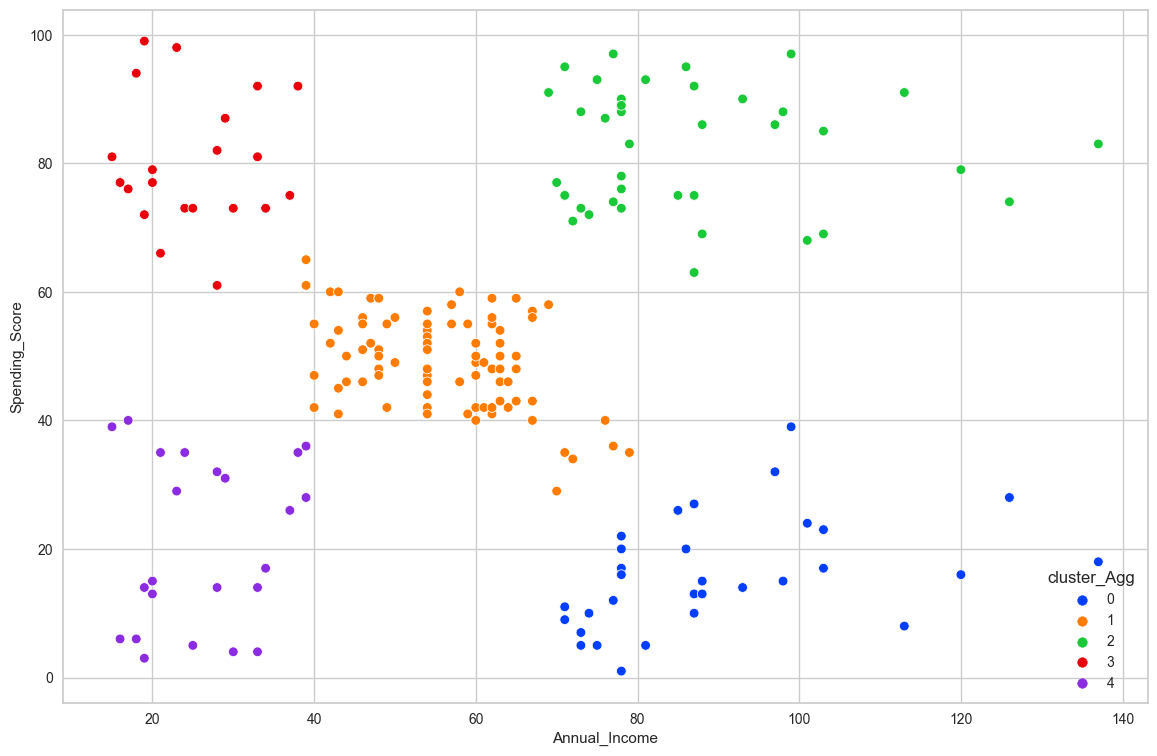

In [78]:
# Create a figure for displaying a scatter plot of Annual Income vs. Spending Score, colored by Agglomerative Clustering labels.
plt.figure(figsize=(14, 9))  # Set the size of the figure to (14, 9) inches.

sns.scatterplot(x='Annual_Income',  # Data for the x-axis, representing 'Annual_Income'.
                y='Spending_Score',  # Data for the y-axis, representing 'Spending_Score'.
                hue='cluster_Agg',  # Cluster labels for coloring different clusters differently.
                data=df_ai_ss,  # DataFrame containing the data for the plot.
                palette="bright")  # Color palette for Agglomerative Clustering clusters.


Text(0.5, 1.0, 'Agg')

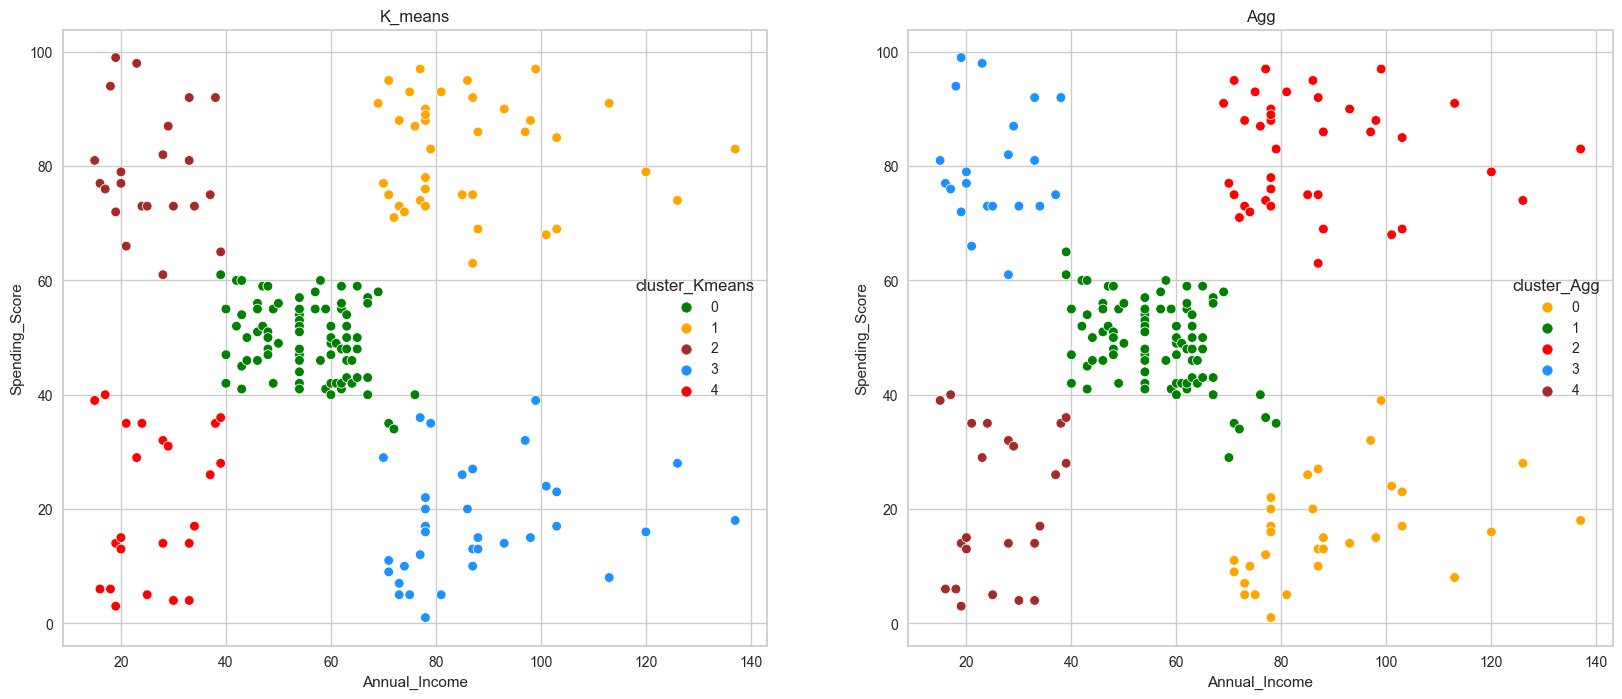

In [79]:
# Create a figure with two subplots for displaying scatter plots of Annual Income vs. Spending Score, colored by cluster labels.
plt.figure(figsize=(20, 8))  # Set the size of the entire figure to (20, 8) inches.

# First subplot (on the left side)
plt.subplot(121)  # Create the first subplot in a 1x2 grid.
sns.scatterplot(x='Annual_Income',  # Data for the x-axis, representing 'Annual_Income'.
                y='Spending_Score',  # Data for the y-axis, representing 'Spending_Score'.
                hue='cluster_Kmeans',  # Cluster labels for coloring different K-means clusters differently.
                data=df_ai_ss,  # DataFrame containing the data for the plot.
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])  # Color palette for K-means clusters.
plt.title("K_means")  # Set the title of the first subplot to "K_means".

# Second subplot (on the right side)
plt.subplot(122)  # Create the second subplot in a 1x2 grid.
sns.scatterplot(x='Annual_Income',  # Data for the x-axis, representing 'Annual_Income'.
                y='Spending_Score',  # Data for the y-axis, representing 'Spending_Score'.
                hue='cluster_Agg',  # Cluster labels for coloring different Agglomerative Clustering clusters differently.
                data=df_ai_ss,  # DataFrame containing the data for the plot.
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])  # Color palette for Agglomerative Clustering clusters.
plt.title("Agg")  # Set the title of the second subplot to "Agg".


In [80]:
# There are healthier transitions in Kmeans
# We chose the Kmeans algorithm finally

#### Interpretation based on Age and Spending Score


In [81]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

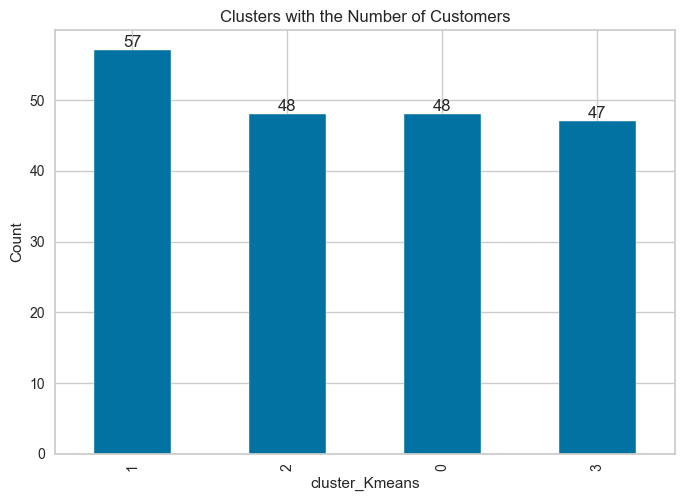

In [82]:
# Display a bar chart showing the number of customers in each cluster for K-means clustering.

plt.title("Clusters with the Number of Customers")  # Set the title of the plot.
plt.xlabel("Clusters")  # Label the x-axis as "Clusters".
plt.ylabel("Count")  # Label the y-axis as "Count".

# Get the value counts of customers in each K-means cluster and create a bar chart.
ax = df_age_ss.cluster_Kmeans.value_counts().plot(kind='bar')

# Add labels to the bars representing the count of customers in each cluster.
ax.bar_label(ax.containers[0])


In [83]:
# Assign the 'cluster_Kmeans' values from df_age_ss to the corresponding rows in the original DataFrame 'df'.
df["cluster_Age_Spending_Score"] = df_age_ss.cluster_Kmeans

# Display the first few rows of the updated DataFrame to show the addition of the new cluster column.
df.head()


,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


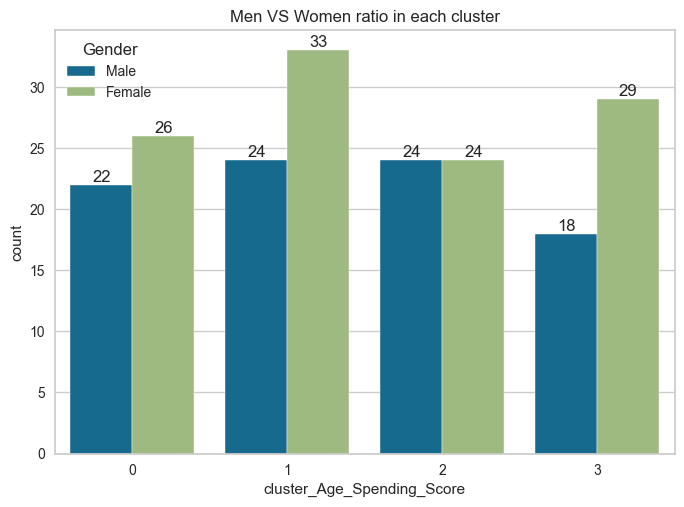

In [84]:
# Set the title of the plot.
plt.title("Men VS Women ratio in each cluster")

# Set the y-axis label.
plt.ylabel("Count")

# Create a countplot showing the clusters on the x-axis, with hue representing gender.
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)

# Add labels to the bars indicating the counts in each cluster for men and women.
for p in ax.containers:
    ax.bar_label(p)

# Explanation:
# - The plot shows the count of men and women in each cluster, where clusters are represented on the x-axis.
# - The 'hue=df.Gender' argument colors the bars based on gender (men and women).
# - 'ax.bar_label(p)' adds labels to the bars indicating the count of men and women in each cluster.


In [85]:
# 2 and 3 clusters draw attention to the excess of women.

In [87]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Group the numeric columns by the "cluster_Age_Spending_Score" column and calculate the mean
cluster_means = numeric_columns.groupby(df['cluster_Age_Spending_Score']).mean()

# This will compute the mean for numeric columns only, excluding non-numeric columns like "Gender".


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

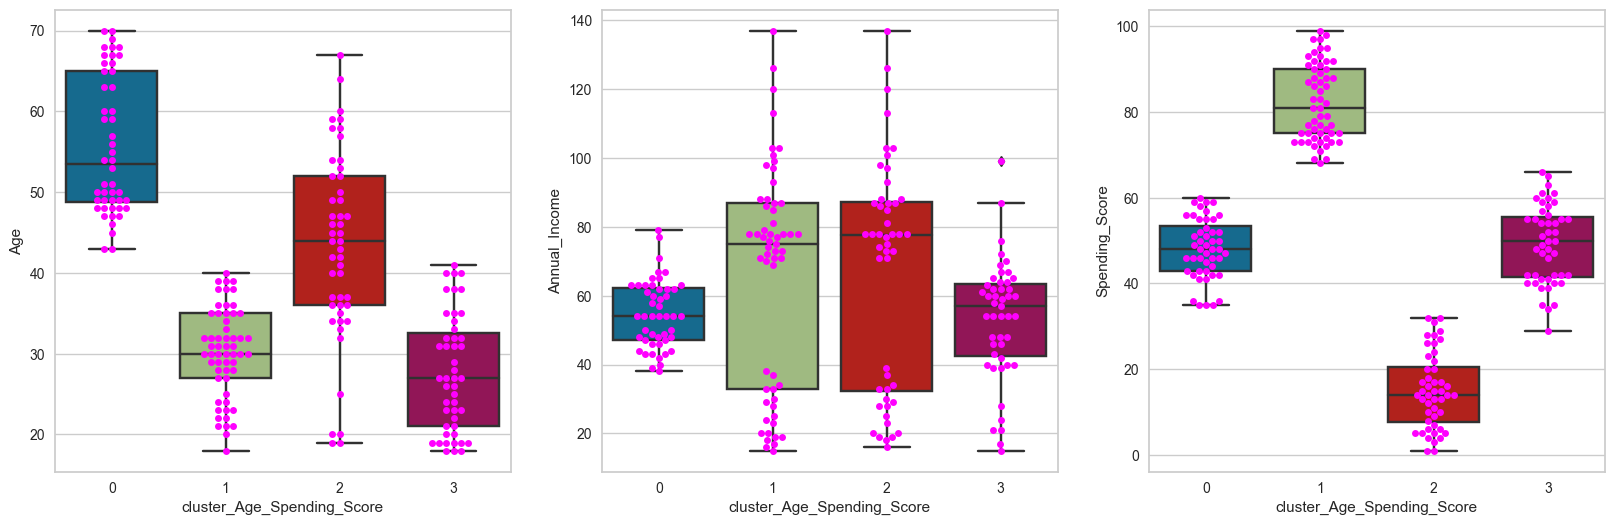

In [88]:
plt.figure(figsize=(20, 6))

# Create the first subplot (1 row, 3 columns, first column)
plt.subplot(131)
# Create a box plot for the 'Age' column against 'cluster_Age_Spending_Score'
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
# Overlay swarm plot points for 'Age' column against 'cluster_Age_Spending_Score'
sns.swarmplot(y="Age", x="cluster_Age_Spending_Score", data=df, color="magenta")

# Create the second subplot (1 row, 3 columns, second column)
plt.subplot(132)
# Create a box plot for the 'Annual_Income' column against 'cluster_Age_Spending_Score'
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
# Overlay swarm plot points for 'Annual_Income' column against 'cluster_Age_Spending_Score'
sns.swarmplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df, color="magenta")

# Create the third subplot (1 row, 3 columns, third column)
plt.subplot(133)
# Create a box plot for the 'Spending_Score' column against 'cluster_Age_Spending_Score'
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
# Overlay swarm plot points for 'Spending_Score' column against 'cluster_Age_Spending_Score'
sns.swarmplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df, color="magenta")


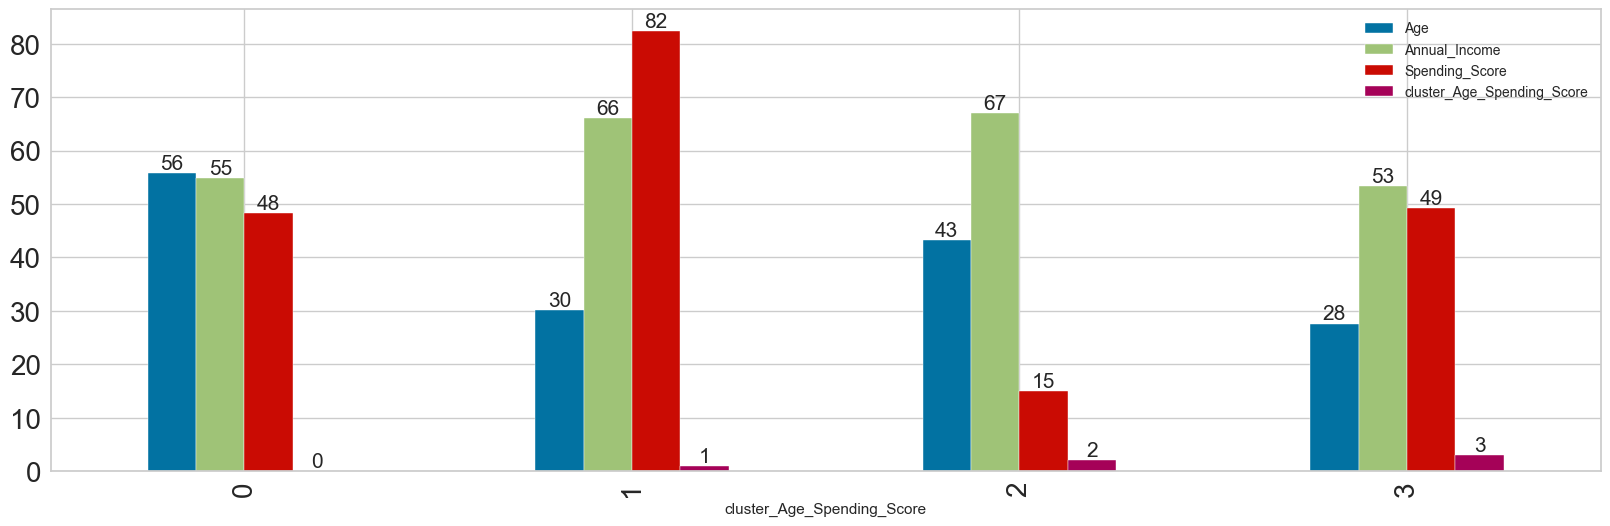

In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'cluster_Age_Spending_Score' column to numeric values
df['cluster_Age_Spending_Score'] = label_encoder.fit_transform(df['cluster_Age_Spending_Score'])

# Select numeric features only
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Group the DataFrame by the encoded 'cluster_Age_Spending_Score' column, calculate the mean for each group, and create a bar plot for numeric features only.
ax = numeric_features.groupby(df['cluster_Age_Spending_Score']).mean().plot(kind='bar', figsize=(20, 6), fontsize=20)

# Add labels to the bars
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)


### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score

In [94]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


In [95]:
df_ai_ss.cluster_Kmeans.value_counts()

cluster_Kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

[Text(0, 0, '81'),
 Text(0, 0, '39'),
 Text(0, 0, '35'),
 Text(0, 0, '23'),
 Text(0, 0, '22')]

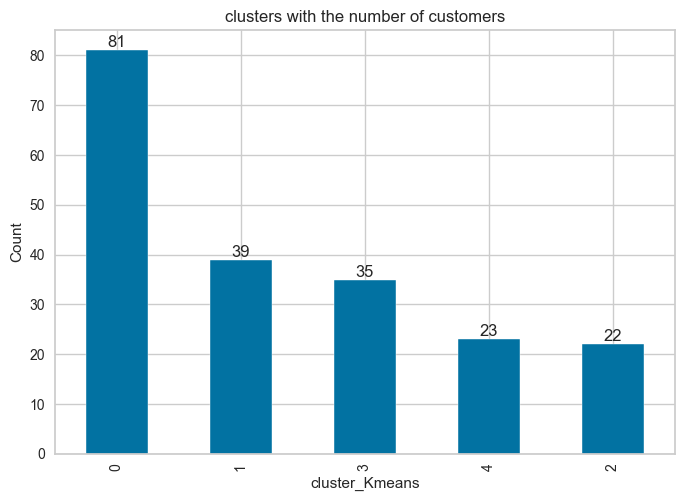

In [96]:
# Set the title of the plot
plt.title("clusters with the number of customers")

# Set the label for the x-axis of the plot
plt.xlabel("clusters")

# Set the label for the y-axis of the plot
plt.ylabel("Count")

# Count the number of occurrences of each unique value in the 'cluster_Kmeans' column of the DataFrame 'df_ai_ss'
# This calculates how many customers belong to each cluster
cluster_counts = df_ai_ss.cluster_Kmeans.value_counts()

# Create a bar plot using the counted values
# Each bar represents a cluster, and the height of the bar corresponds to the count of customers in that cluster
ax = cluster_counts.plot(kind='bar')

# Add labels to the bars in the bar plot
# 'ax.containers[0]' refers to the bars in the plot, and 'ax.bar_label()' adds labels to these bars
# The labels represent the exact count of customers in each cluster, providing a clear visual representation
ax.bar_label(ax.containers[0])


In [97]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


In [98]:
# Drop the 'cluster_Age_Spending_Score' column from the DataFrame 'df'
# The 'inplace=True' parameter ensures that the change is made directly to the original DataFrame without the need for reassignment
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# Comment explaining the purpose of dropping the 'cluster_Age_Spending_Score' column
# By dropping this column, the analysis will be focused on the clusters created using Kmeans
# This allows for a more specific examination of the relationship between Annual_Income and Spending_Score within the identified clusters
# The analysis will no longer consider the age-based clusters, enabling a targeted study of customer behavior related to income and spending patterns
# The 'inplace=True' parameter modifies the DataFrame without the need for creating a new DataFrame
# This change is essential for subsequent analysis and visualization specific to the Kmeans clusters
# Therefore, the 'cluster_Age_Spending_Score' column is removed from the DataFrame to facilitate a more focused analysis on income and spending behavior


In [99]:
# Create a new column 'cluster_Annual_Income_Spending_Score' in the DataFrame 'df' 
# Assign values from the 'cluster_Kmeans' column of the 'df_ai_ss' DataFrame to the new column
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans

# Display the first few rows of the updated DataFrame to show the addition of the new column
df.head()

# A new column 'cluster_Annual_Income_Spending_Score' is created in the DataFrame 'df'
# This column is populated with cluster labels obtained from the 'cluster_Kmeans' column of the 'df_ai_ss' DataFrame
# The 'head()' function is used to display the first few rows of the updated DataFrame, showcasing the new column
# Adding this column facilitates easy reference to customer clusters based on their Annual Income and Spending Score


,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


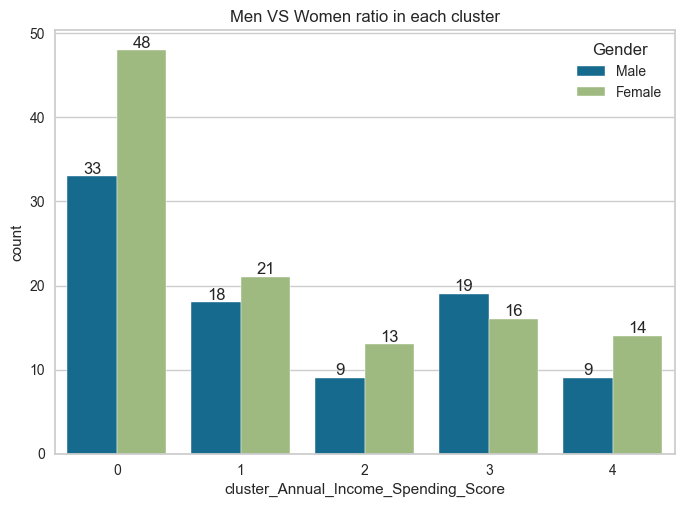

In [100]:
# Set the title of the plot as "Men VS Women ratio in each cluster"
plt.title("Men VS Women ratio in each cluster")

# Set the label for the y-axis as "Count"
plt.ylabel("Count")

# Create a count plot using seaborn, with 'cluster_Annual_Income_Spending_Score' on the x-axis and 'Gender' as the hue
ax = sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)

# Add labels to the bars in the plot representing the count of men and women in each cluster
for p in ax.containers:
    ax.bar_label(p)

# This code creates a count plot using seaborn to visualize the distribution of men and women in each cluster.
# The x-axis represents the clusters based on 'cluster_Annual_Income_Spending_Score', and different colors 
# are used to differentiate between men and women ('Gender' column).
# The count of men and women in each cluster is displayed on top of the respective bars for easy interpretation.


In [101]:
# Group the DataFrame 'df' by both 'Gender' and 'cluster_Annual_Income_Spending_Score', and calculate the mean for each group
grouped_data = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# In this line, the DataFrame 'df' is grouped based on two columns: 'Gender' and 'cluster_Annual_Income_Spending_Score'.
# The mean values of the numeric features for each combination of gender and cluster are calculated.
# This allows us to analyze the average values of different features for men and women within each cluster.


<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

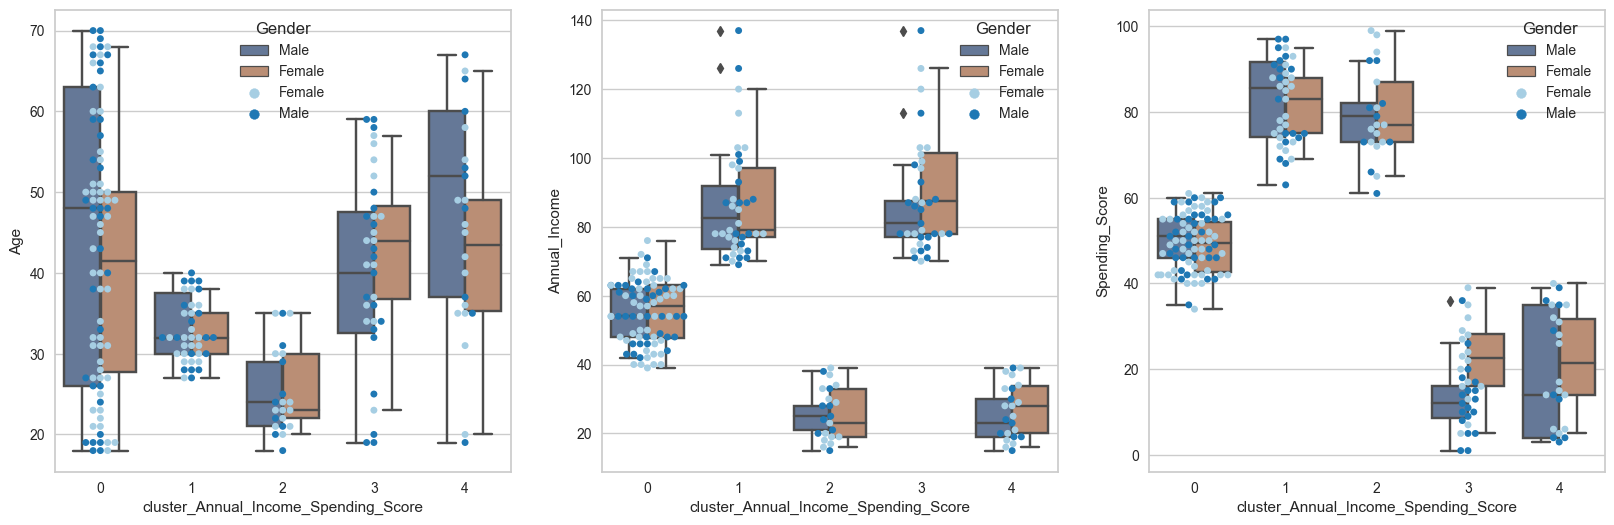

In [102]:
# Create a figure with 3 subplots and set the size of the figure
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(131)
# Create a boxplot for 'Age' against 'cluster_Annual_Income_Spending_Score', grouped by 'Gender'
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette="deep", saturation=0.5)
# Overlay swarmplot on the boxplot to show individual data points
sns.swarmplot(y="Age", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette=sns.color_palette("Paired"))

# Second subplot
plt.subplot(132)
# Create a boxplot for 'Annual_Income' against 'cluster_Annual_Income_Spending_Score', grouped by 'Gender'
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette="deep", saturation=0.5)
# Overlay swarmplot on the boxplot to show individual data points
sns.swarmplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette=sns.color_palette("Paired"))

# Third subplot
plt.subplot(133)
# Create a boxplot for 'Spending_Score' against 'cluster_Annual_Income_Spending_Score', grouped by 'Gender'
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette="deep", saturation=0.5)
# Overlay swarmplot on the boxplot to show individual data points
sns.swarmplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score", hue="Gender", data=df, palette=sns.color_palette("Paired"))


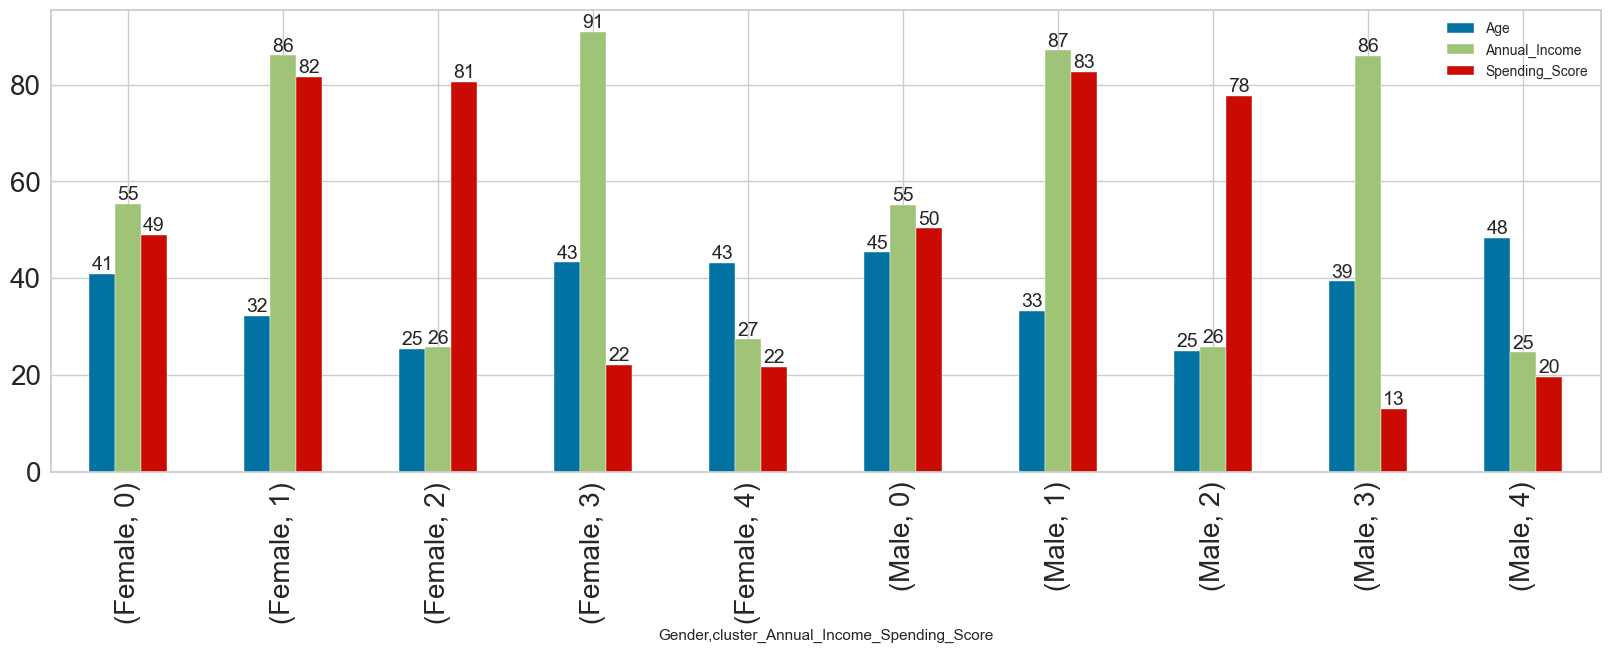

In [103]:
# Group the DataFrame by both 'Gender' and 'cluster_Annual_Income_Spending_Score', calculate the mean for each group, and create a bar plot.
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20, 6), fontsize=20)

# Iterate through the bar containers in the plot and add labels with formatted values to each bar.
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)


## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.